In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

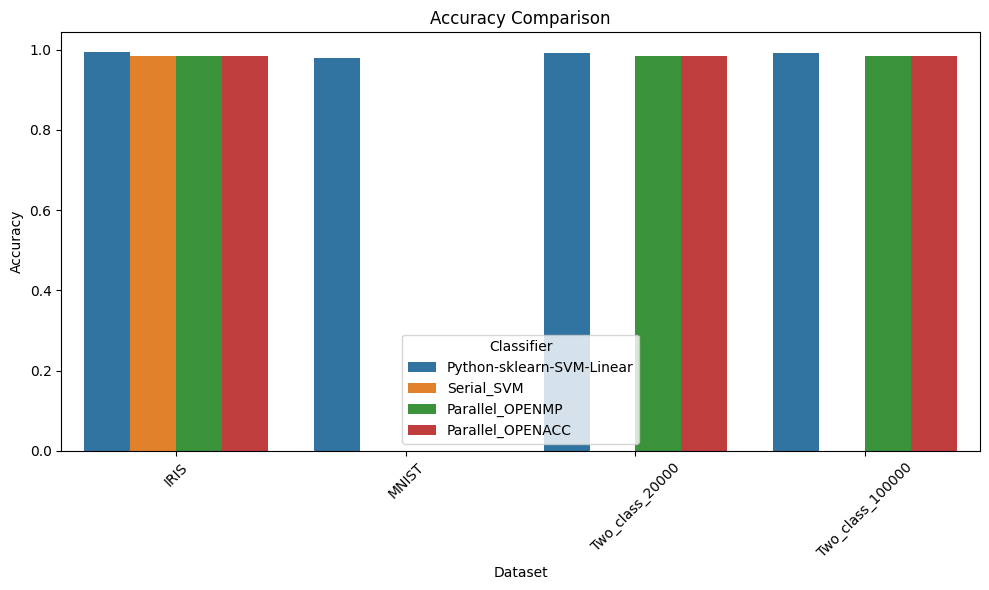

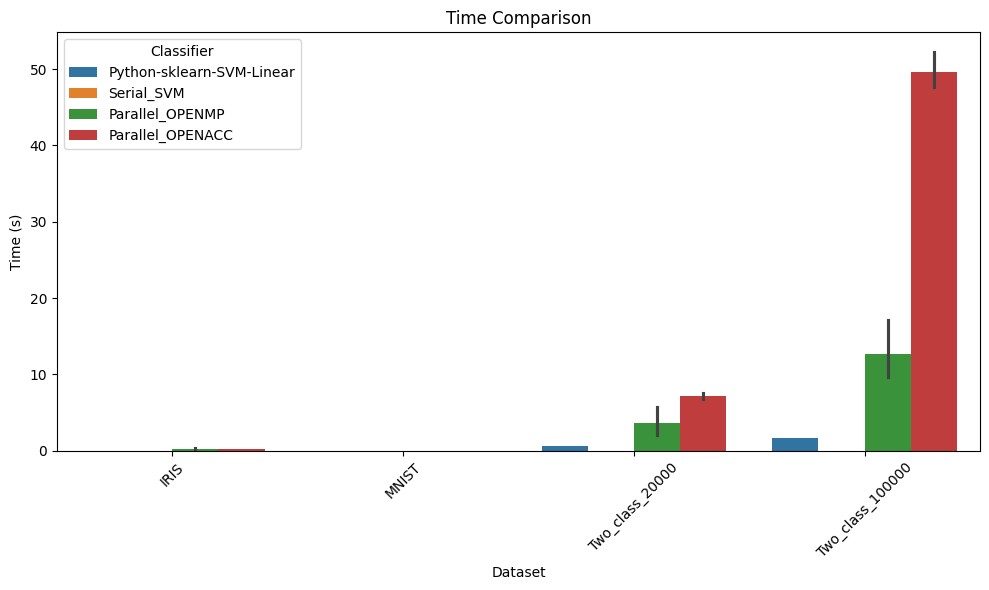

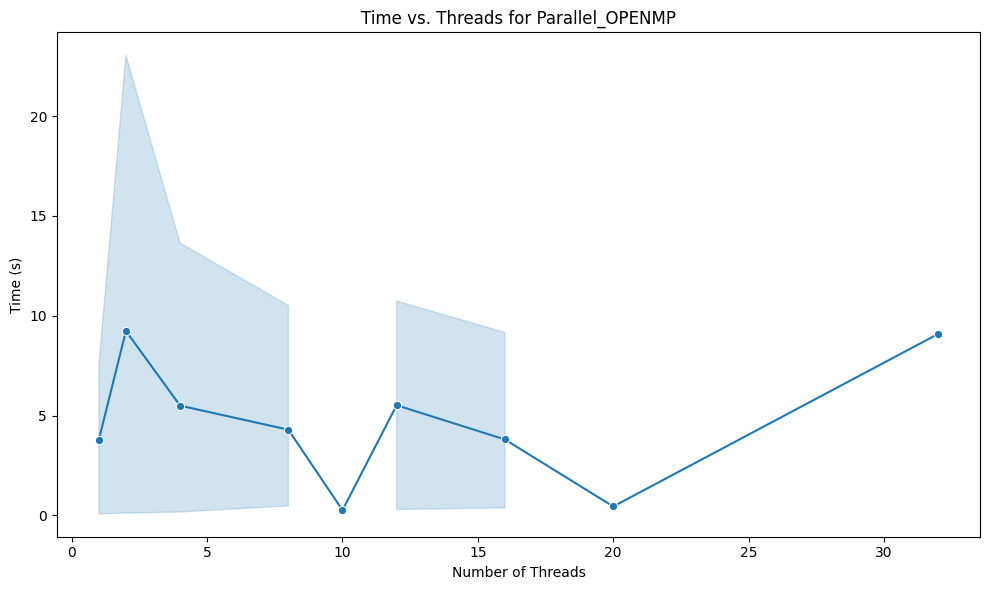

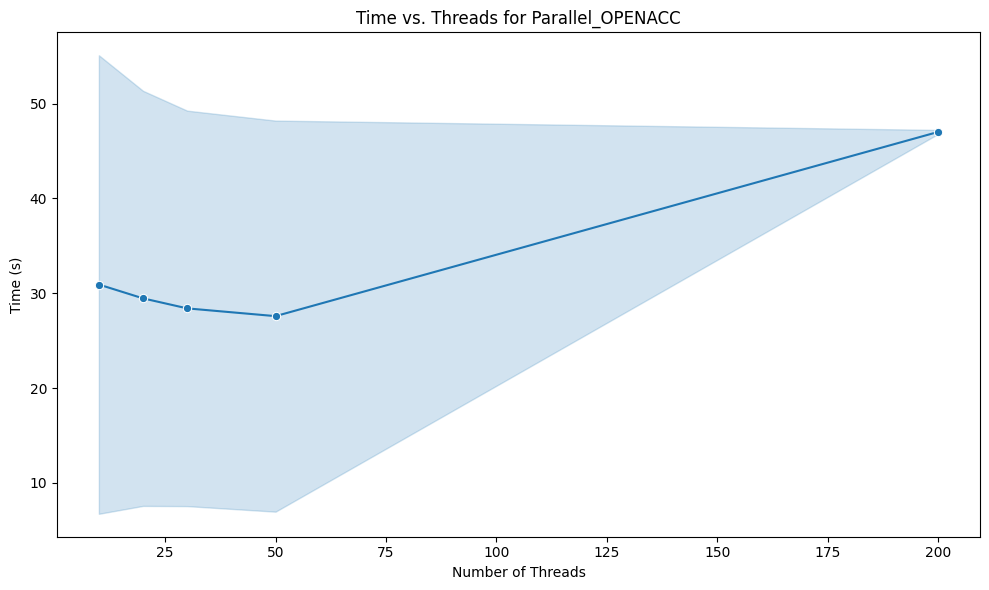

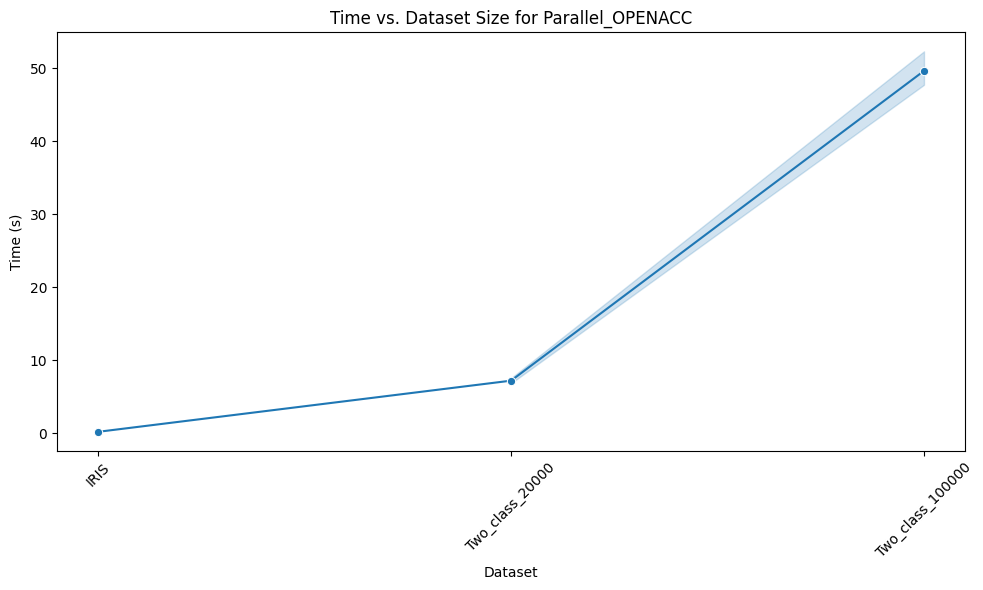

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the data
data = pd.read_csv("../Benchmark.csv")

# Step 2: Data Preprocessing (if necessary)

# Step 3: Plot 1 - Accuracy Comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='dataset', y='accuracy', hue='classifier')
plt.title('Accuracy Comparison')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend(title='Classifier')
plt.tight_layout()
plt.show()

# Step 4: Plot 2 - Time Comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='dataset', y='time', hue='classifier')
plt.title('Time Comparison')
plt.xlabel('Dataset')
plt.ylabel('Time (s)')
plt.xticks(rotation=45)
plt.legend(title='Classifier')
plt.tight_layout()
plt.show()

# Step 5: Plot 3 - Time vs. Threads for Parallel_OPENMP
openmp_data = data[data['classifier'] == 'Parallel_OPENMP']
plt.figure(figsize=(10, 6))
sns.lineplot(data=openmp_data, x='threads', y='time', marker='o')
plt.title('Time vs. Threads for Parallel_OPENMP')
plt.xlabel('Number of Threads')
plt.ylabel('Time (s)')
plt.tight_layout()
plt.show()

# Step 6: Plot 4 - Time vs. Threads for Parallel_OPENACC
openacc_data = data[data['classifier'] == 'Parallel_OPENACC']
plt.figure(figsize=(10, 6))
sns.lineplot(data=openacc_data, x='threads', y='time', marker='o')
plt.title('Time vs. Threads for Parallel_OPENACC')
plt.xlabel('Number of Threads')
plt.ylabel('Time (s)')
plt.tight_layout()
plt.show()

# Step 7: Plot 5 - Time vs. Dataset Size
plt.figure(figsize=(10, 6))
sns.lineplot(data=openacc_data, x='dataset', y='time', marker='o')
plt.title('Time vs. Dataset Size for Parallel_OPENACC')
plt.xlabel('Dataset')
plt.ylabel('Time (s)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [45]:
data = pd.read_csv("../Benchmark.csv")

In [46]:
data.drop('accuracy', axis=1, inplace=True)

In [35]:
data = data.groupby(['dataset', 'classifier', 'threads']).mean().reset_index()

In [41]:
data

,dataset,classifier,time,threads
0,IRIS,Python-sklearn-SVM-Linear,0.002626,NaN
1,MNIST,Python-sklearn-SVM-Linear,0.003000,NaN
2,Two_class_20000,Python-sklearn-SVM-Linear,0.604084,NaN
3,IRIS,Serial_SVM,0.004183,NaN
4,IRIS,Parallel_OPENMP,0.085224,1.0
5,IRIS,Parallel_OPENMP,0.118397,2.0
6,IRIS,Parallel_OPENMP,0.176603,4.0
7,IRIS,Parallel_OPENMP,0.479955,8.0
8,IRIS,Parallel_OPENMP,0.267888,10.0
9,IRIS,Parallel_OPENMP,0.302867,12.0


In [29]:
data_openacc = data[data['classifier'] == 'Parallel_OPENACC']

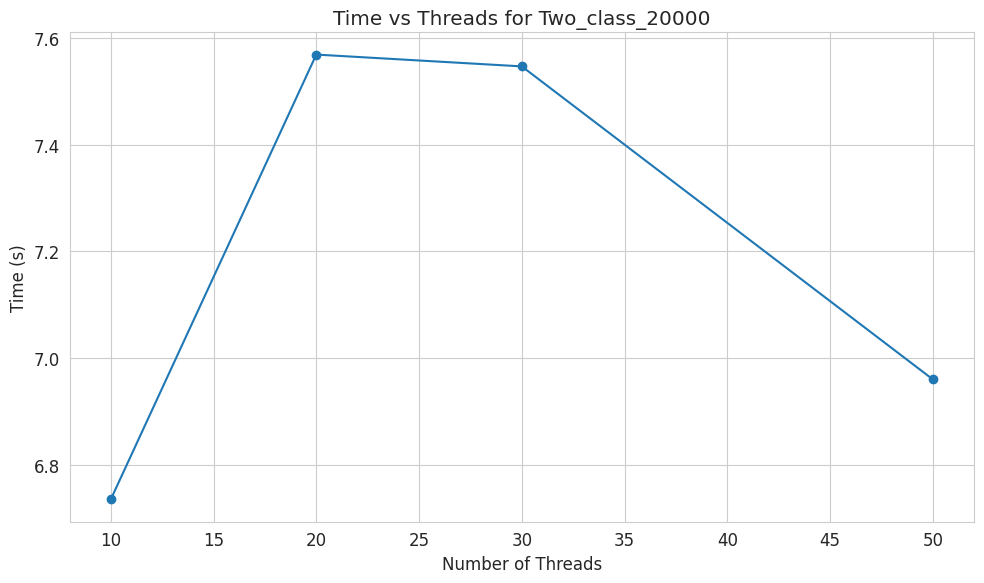

In [42]:
data = data_openacc
import matplotlib.pyplot as plt

# Get the unique datasets
datasets = data['dataset'].unique()

# Iterate over the datasets
for dataset in datasets:
    # Filter the data for the current dataset
    dataset_data = data[data['dataset'] == dataset]
    
    # Plot time vs threads
    plt.close()
    plt.figure(figsize=(10, 6))
    plt.plot(dataset_data['threads'], dataset_data['time'], marker='o')
    plt.title(f'Time vs Threads for {dataset}')
    plt.xlabel('Number of Threads')
    plt.ylabel('Time (s)')
    plt.tight_layout()
    plt.savefig(f'../Plots/openacc_time_vs_threads_{dataset}.png')    


In [31]:
data

,dataset,classifier,threads,time
8,Two_class_100000,Parallel_OPENACC,10.0,55.106237
9,Two_class_100000,Parallel_OPENACC,20.0,51.355912
10,Two_class_100000,Parallel_OPENACC,30.0,49.263075
11,Two_class_100000,Parallel_OPENACC,50.0,48.213410
12,Two_class_100000,Parallel_OPENACC,200.0,47.015009
19,Two_class_20000,Parallel_OPENACC,10.0,6.736135
20,Two_class_20000,Parallel_OPENACC,20.0,7.568177
21,Two_class_20000,Parallel_OPENACC,30.0,7.546082
22,Two_class_20000,Parallel_OPENACC,50.0,6.960664


In [49]:
data

,dataset,classifier,time,threads
0,IRIS,Python-sklearn-SVM-Linear,0.002626,NaN
1,MNIST,Python-sklearn-SVM-Linear,0.003000,NaN
2,Two_class_20000,Python-sklearn-SVM-Linear,0.604084,NaN
3,IRIS,Serial_SVM,0.004183,NaN
4,IRIS,Parallel_OPENMP,0.085224,1.0
5,IRIS,Parallel_OPENMP,0.118397,2.0
6,IRIS,Parallel_OPENMP,0.176603,4.0
7,IRIS,Parallel_OPENMP,0.479955,8.0
8,IRIS,Parallel_OPENMP,0.267888,10.0
9,IRIS,Parallel_OPENMP,0.302867,12.0


<Figure size 1000x600 with 0 Axes>

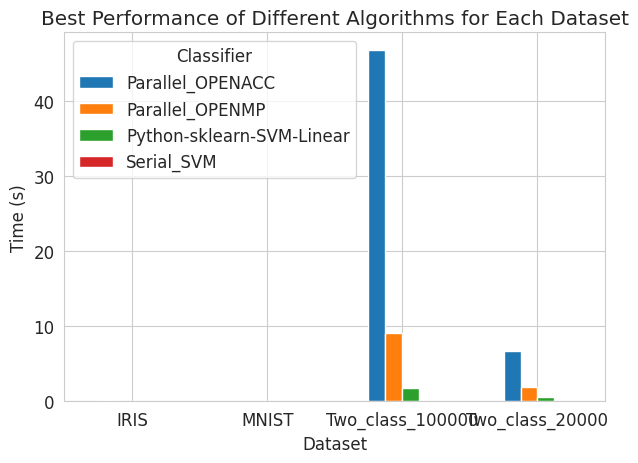

In [48]:
import matplotlib.pyplot as plt

# Group the data by dataset and find the best performance for each algorithm
best_performance = data.groupby(['dataset', 'classifier'])['time'].min().unstack()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar chart
best_performance.plot(kind='bar', rot=0)

# Set the title and axis labels
plt.title('Best Performance of Different Algorithms for Each Dataset')
plt.xlabel('Dataset')
plt.ylabel('Time (s)')

# Show the legend
plt.legend(title='Classifier')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [47]:
data

,dataset,classifier,time,threads
0,IRIS,Python-sklearn-SVM-Linear,0.002626,NaN
1,MNIST,Python-sklearn-SVM-Linear,0.003000,NaN
2,Two_class_20000,Python-sklearn-SVM-Linear,0.604084,NaN
3,IRIS,Serial_SVM,0.004183,NaN
4,IRIS,Parallel_OPENMP,0.085224,1.0
5,IRIS,Parallel_OPENMP,0.118397,2.0
6,IRIS,Parallel_OPENMP,0.176603,4.0
7,IRIS,Parallel_OPENMP,0.479955,8.0
8,IRIS,Parallel_OPENMP,0.267888,10.0
9,IRIS,Parallel_OPENMP,0.302867,12.0


In [ ]:
data